In [11]:
import pandas as pd
df=pd.read_csv('c:/data/basket/dvdtrans.csv')
df.head()


,ID,Item
0,1,Sixth Sense
1,1,LOTR1
2,1,Harry Potter1
3,1,Green Mile
4,1,LOTR2


In [12]:
df.shape

(30, 2)

In [13]:
# 2차원 리스트로 읽기
items = []
for row in range(0, df.shape[0]):
    items.append([df.iloc[row,0],str(df.iloc[row,1])])
items

[[1, 'Sixth Sense'],
 [1, 'LOTR1'],
 [1, 'Harry Potter1'],
 [1, 'Green Mile'],
 [1, 'LOTR2'],
 [2, 'Gladiator'],
 [2, 'Patriot'],
 [2, 'Braveheart'],
 [3, 'LOTR1'],
 [3, 'LOTR2'],
 [4, 'Gladiator'],
 [4, 'Patriot'],
 [4, 'Sixth Sense'],
 [5, 'Gladiator'],
 [5, 'Patriot'],
 [5, 'Sixth Sense'],
 [6, 'Gladiator'],
 [6, 'Patriot'],
 [6, 'Sixth Sense'],
 [7, 'Harry Potter1'],
 [7, 'Harry Potter2'],
 [8, 'Gladiator'],
 [8, 'Patriot'],
 [9, 'Gladiator'],
 [9, 'Patriot'],
 [9, 'Sixth Sense'],
 [10, 'Sixth Sense'],
 [10, 'LOTR'],
 [10, 'Gladiator'],
 [10, 'Green Mile']]

In [3]:
result=[]
for i in range(1,11):
    row=[]
    for item in items:
        if item[0]==i:
            row.append(item[1])
    result.append(row)
print(result)

[['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2'], ['Gladiator', 'Patriot', 'Braveheart'], ['LOTR1', 'LOTR2'], ['Gladiator', 'Patriot', 'Sixth Sense'], ['Gladiator', 'Patriot', 'Sixth Sense'], ['Gladiator', 'Patriot', 'Sixth Sense'], ['Harry Potter1', 'Harry Potter2'], ['Gladiator', 'Patriot'], ['Gladiator', 'Patriot', 'Sixth Sense'], ['Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile']]


In [4]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
te = TransactionEncoder()
t_arr = te.fit(result).transform(result)
print(te.columns_)
print(t_arr)
df2 = pd.DataFrame(t_arr, columns = te.columns_)
df2

['Braveheart', 'Gladiator', 'Green Mile', 'Harry Potter1', 'Harry Potter2', 'LOTR', 'LOTR1', 'LOTR2', 'Patriot', 'Sixth Sense']
[[False False  True  True False False  True  True False  True]
 [ True  True False False False False False False  True False]
 [False False False False False False  True  True False False]
 [False  True False False False False False False  True  True]
 [False  True False False False False False False  True  True]
 [False  True False False False False False False  True  True]
 [False False False  True  True False False False False False]
 [False  True False False False False False False  True False]
 [False  True False False False False False False  True  True]
 [False  True  True False False  True False False False  True]]


,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
0,False,False,True,True,False,False,True,True,False,True
1,True,True,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,True,False,False
3,False,True,False,False,False,False,False,False,True,True
4,False,True,False,False,False,False,False,False,True,True
5,False,True,False,False,False,False,False,False,True,True
6,False,False,False,True,True,False,False,False,False,False
7,False,True,False,False,False,False,False,False,True,False
8,False,True,False,False,False,False,False,False,True,True
9,False,True,True,False,False,True,False,False,False,True


In [5]:
from mlxtend.frequent_patterns import apriori
frequent = apriori(df2, min_support=0.2, use_colnames=True)
frequent

,support,itemsets
0,0.7,(Gladiator)
1,0.2,(Green Mile)
2,0.2,(Harry Potter1)
3,0.2,(LOTR1)
4,0.2,(LOTR2)
5,0.6,(Patriot)
6,0.6,(Sixth Sense)
7,0.6,"(Gladiator, Patriot)"
8,0.5,"(Gladiator, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [6]:
# 신뢰도 0.1 기준
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent, metric='confidence', min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
3,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
9,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


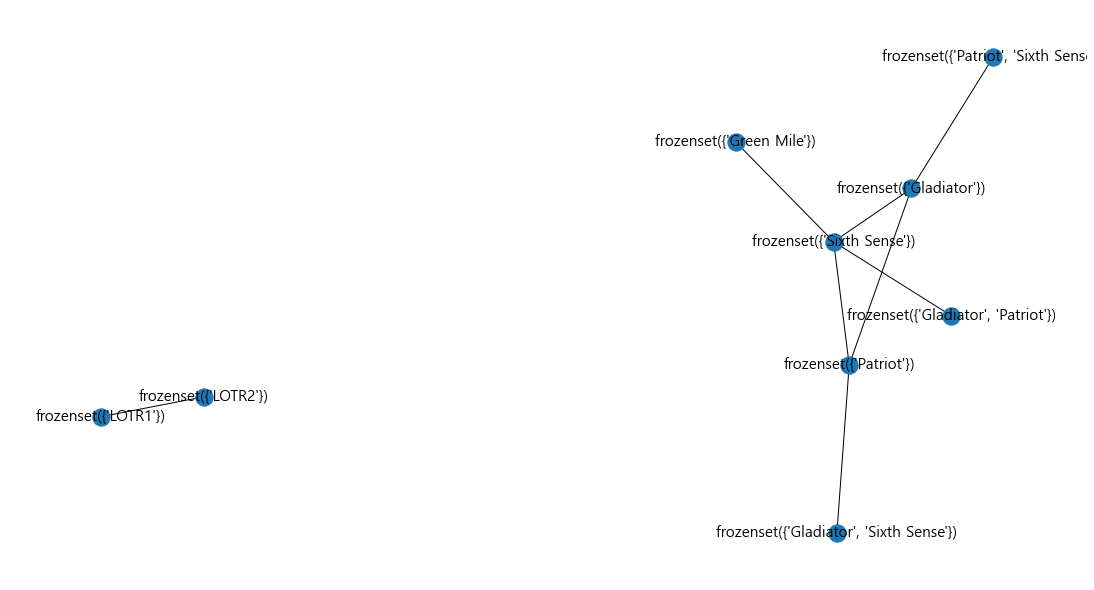

In [7]:
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import networkx as nx
import matplotlib.pyplot as plt
ga=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
plt.figure(figsize=(15,8))
nx.draw(ga,with_labels=True,font_family=font_name,font_size=15)